# Table of Contents
1. Introduction
2. Import
3. Analysis & Preprocessing
4. Model
5. Training
6. Analysis & Conclusion

# 1. Introduction
References:
- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MAE%3A%20It%20is%20not%20very,the%20weighted%20individual%20differences%20equally.

# 2. Import


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.metrics as metrics

# 3. Analysis & Preprocessing

In [2]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data_feat = pd.DataFrame(data, columns = data.columns[:-1])
data_feat = data_feat.drop(['S.No','Age'], axis=1)

data.head(5)
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(data)
n = 20
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       2.116693                1.364192   
1                       1.781763                1.577277   
2                       2.423064                1.424486   
3                       4.657487                1.366377   
4                       3.795704                1.701514   
...                          ...                     ...   
4221                    3.332053                2.220375   
4222                    4.258130               -2.535943   
4223                    7.826457                2.169780   
4224                   -0.702317                2.439428   
4225                   -2.373678               -3.566133   

      Left-Lateral-Ventricle  lh_lateralorbitofrontal_thickness  SurfaceHoles  \
0                   1.509690                          -2.003048     -1.881062   
1                   1.751915                          -1.118768     -1.487368   
2     

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_lateralorbitofrontal_thickness,SurfaceHoles,CC_Posterior,rh_entorhinal_thickness,CC_Posterior,Right-Caudate,MaskVol-to-eTIV,rh_frontalpole_thickness,MaskVol-to-eTIV,Right-Cerebellum-White-Matter,MaskVol-to-eTIV,Left-vessel,non-WM-hypointensities,rh_isthmuscingulate_thickness,5th-Ventricle,non-WM-hypointensities,Left-vessel
0,2.116693,1.364192,1.509690,-2.003048,-1.881062,2.275291,-1.646929,-0.014603,-0.455127,1.796729,-0.679393,0.104424,-1.141063,1.573431,-1.159093,-0.417015,0.090793,-0.937496,0.261800,0.078680
1,1.781763,1.577277,1.751915,-1.118768,-1.487368,2.076278,-1.813623,-0.372086,-0.911972,1.974108,-0.611399,0.555653,-0.934538,1.449886,-1.570098,-0.800062,-0.422113,-0.518682,0.396438,0.258847
2,2.423064,1.424486,1.583744,-1.542772,-1.247103,1.776939,-2.457333,-0.636613,-1.255602,1.762072,-0.733668,0.541905,-0.497774,1.726920,-1.110241,-0.868901,-0.211182,-0.183662,0.325125,-0.164866
3,4.657487,1.366377,1.174566,-0.638117,-1.459437,2.255052,-1.235504,-0.942565,-1.100492,1.570616,-0.537640,0.040204,-0.533427,1.805882,-1.553970,-0.246886,-0.408339,-0.493771,0.399181,-0.184321
4,3.795704,1.701514,2.226951,-1.243184,-1.390031,2.823588,-1.682617,-0.284929,-0.686542,1.793880,-0.838911,0.428843,-1.060138,2.051861,-0.761959,-0.630384,-0.543936,-0.964464,0.468170,0.363352


In [4]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (3380, 20)
y_train shape is: (3380,) 

x_val shape is: (634, 20)
y_val shape is: (634,) 

x_test shape is: (212, 20)
y_test shape is: (212,)


In [5]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))


opt = Adam(learning_rate=0.001)

model.compile(
            loss='mean_absolute_error',
            optimizer=opt,
            metrics= ['mean_absolute_error']
            )

model.summary()

Metal device set to: Apple M1


2022-04-09 15:24:29.373455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-09 15:24:29.373633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Batc  (None, 8)                3

In [6]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=10, restore_best_weights = True)

In [7]:
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=['msle']
)
# train the model
hist = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=32,
    validation_data=(x_val, y_val), 
    callbacks = [earlystopping]
)

Epoch 1/100


2022-04-09 15:24:30.044180: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-09 15:24:30.830345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - ETA: 0s - loss: 13.9909 - msle: 13.9909

2022-04-09 15:24:35.221492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - 6s 42ms/step - loss: 13.9909 - msle: 13.9909 - val_loss: 13.9816 - val_msle: 13.9816
Epoch 2/100
106/106 [==============================] - 4s 35ms/step - loss: 11.6265 - msle: 11.6265 - val_loss: 11.8713 - val_msle: 11.8713
Epoch 3/100
106/106 [==============================] - 4s 39ms/step - loss: 10.0943 - msle: 10.0943 - val_loss: 9.7664 - val_msle: 9.7664
Epoch 4/100
106/106 [==============================] - 5s 43ms/step - loss: 8.7186 - msle: 8.7186 - val_loss: 7.8928 - val_msle: 7.8928
Epoch 5/100
106/106 [==============================] - 4s 36ms/step - loss: 7.3151 - msle: 7.3151 - val_loss: 6.3580 - val_msle: 6.3580
Epoch 6/100
106/106 [==============================] - 4s 33ms/step - loss: 6.2327 - msle: 6.2327 - val_loss: 5.7294 - val_msle: 5.7294
Epoch 7/100
106/106 [==============================] - 4s 36ms/step - loss: 5.5081 - msle: 5.5081 - val_loss: 5.1801 - val_msle: 5.1801
Epoch 8/100
106/106 [=============================

Epoch 61/100
106/106 [==============================] - 3s 32ms/step - loss: 0.0437 - msle: 0.0437 - val_loss: 0.0358 - val_msle: 0.0358
Epoch 62/100
106/106 [==============================] - 3s 26ms/step - loss: 0.0391 - msle: 0.0391 - val_loss: 0.0346 - val_msle: 0.0346
Epoch 63/100
106/106 [==============================] - 3s 25ms/step - loss: 0.0377 - msle: 0.0377 - val_loss: 0.0334 - val_msle: 0.0334
Epoch 64/100
106/106 [==============================] - 3s 27ms/step - loss: 0.0374 - msle: 0.0374 - val_loss: 0.0327 - val_msle: 0.0327
Epoch 65/100
106/106 [==============================] - 3s 27ms/step - loss: 0.0360 - msle: 0.0360 - val_loss: 0.0308 - val_msle: 0.0308
Epoch 66/100
106/106 [==============================] - 3s 28ms/step - loss: 0.0363 - msle: 0.0363 - val_loss: 0.0294 - val_msle: 0.0294
Epoch 67/100
106/106 [==============================] - 3s 28ms/step - loss: 0.0335 - msle: 0.0335 - val_loss: 0.0290 - val_msle: 0.0290
Epoch 68/100
106/106 [===================

In [8]:
y_pred = model.predict(x_test)

print("Explained variance: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(y_test, y_pred)))

Explained variance: 0.8591236303319296
Max Error: 21.710084915161133
Mean absolute error: 5.96589498699836
Mean squared error: 58.058176847947045
Root Mean squared error: 7.619591645747628
R2: 0.8519259238686079


2022-04-09 15:29:26.721073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


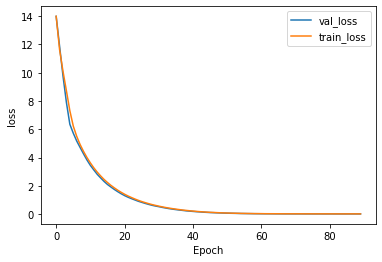

In [11]:
x = list(range(90))
vy = hist.history['val_loss']
ty = hist.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()